In [1]:
from src.acoustic_analyser import frame
import numpy as np

test_frame = frame.from_file(
    member_file="test_member.json", constraint_file="test_constraint.csv", debug=False
)

free_end = test_frame.fixed_end(member_id=0)
free_end = test_frame.free_end(member_id=1)

In [2]:
np.abs(test_frame.get_determinant(w=10))

0.22435014400184505

In [3]:
# _ = test_frame.get_frequency_graph(lower_limit=1, upper_limit=100, step_size=2)

In [4]:
test_frame.get_natural_frequency_newton(initial_guess=10)

11.164710566688555

In [5]:
# test_frame.get_natural_frequency_bisect(lower_limit=50, upper_limit=55)

In [6]:
subs_dict = test_frame.get_params_solution(natural_freq=11.16)

In [110]:
from src.modules.bc import fixed_end, free_end
from matplotlib import pyplot as plt

step_size = 0.1
constraint: bc = test_frame.constraints[1]
member_curr = constraint.member
offset = np.array([0, 0])
angle = 0
Handle = True
to_plot = []

x = np.append(np.arange(step_size, member_curr.length, step_size), member_curr.length)
v, u = member_curr.get_deformation(
    w=2 * np.pi * 11.16, lengths=x, id=constraint.id, subs_dict=subs_dict
)
x_deformed = np.real(v) + x
y_deformed = np.real(u)
points_deformed = np.stack([x_deformed, y_deformed]).T.reshape(len(x), 1, 2)
R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotated = np.matmul(points_deformed, np.stack([R] * len(x_deformed)))
rotated_translated = rotated + offset
to_plot.append(rotated_translated)

In [114]:
member_curr.constraint_ids

[0, 1]

In [115]:
test_frame.constraints

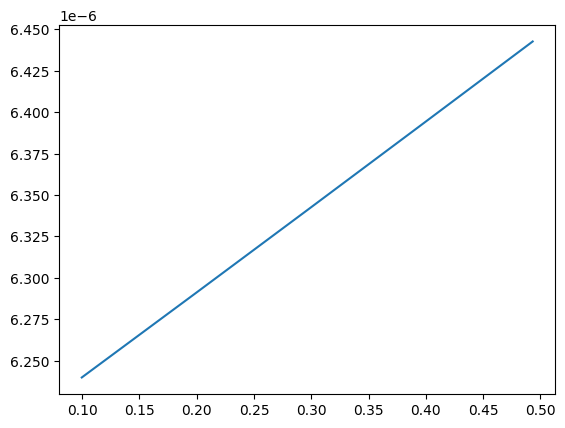

In [26]:
plt.plot(x_deformed, y_deformed)

In [9]:
print("Essential till mode shape verified")
# from sympy import Matrix, E, I
# def get_propagation_matrix(obj, w: float, length: float):
#         C = (obj.youngs_modulus / obj.density) ** 0.5
#         K = (obj.inertia / obj.cross_section_area) ** 0.5

#         alpha = (w * K / C) ** 0.5
#         beta = w * K / C
#         L_bar = length / K

#         propagation_matrix = Matrix(
#             [
#                 [E ** (-I * alpha * L_bar), 0, 0],
#                 [0, E ** (-alpha * L_bar), 0],
#                 [0, 0, E ** (-I * beta * L_bar)],
#             ]
#         )
#         return propagation_matrix
# w = 2*np.pi*11.16
# propagation_matrix_subs = get_propagation_matrix(member_curr,w=w,length=points[0])
# propagation_matrix_inv_subs = propagation_matrix_subs.inv()
# a_plus_subs = member_curr.a_plus.subs(subs_dict)
# a_minus_subs = member_curr.a_minus.subs(subs_dict)

# v = (Matrix([1,1,0]).T*propagation_matrix_subs*a_plus_subs + Matrix([1,1,0]).T*propagation_matrix_inv_subs*a_minus_subs).evalf()
# u = (Matrix([0,0,1]).T*propagation_matrix_subs*a_plus_subs + Matrix([0,0,1]).T*propagation_matrix_inv_subs*a_minus_subs).evalf()
# u[0]

Essential till mode shape verified
